In [ ]:
"""
To implement the axon finding that was brainstormed into
4 parts

1) Candidates
2) Filtering
3) Combining
4) Ranking

"""

In [1]:
from os import sys
sys.path.append("/meshAfterParty/")
#sys.path.append("../../meshAfterParty/meshAfterParty")

In [2]:
from importlib import reload
import os
from pathlib import Path
os.getcwd()

import neuron_utils as nru
nru = reload(nru)
import neuron
neuron=reload(neuron)
import neuron_visualizations as nviz
import time
import system_utils as su

# Loading Neuron Object

In [3]:
current_file = "/notebooks/test_neurons/meshafterparty_processed/12345_double_soma_meshafterparty_9_29"
neuron_obj = nru.decompress_neuron(filepath=current_file,
                                  original_mesh=current_file,
                                  suppress_output=True)


Decompressing Neuron in minimal output mode...please wait


In [4]:
import neuron_searching as ns
ns = reload(ns)
current_neuron = neuron_obj

In [5]:
ret_col = nviz.visualize_neuron(current_neuron,
                                visualize_type=["mesh","skeleton"],
                     limb_branch_dict="all",
                     mesh_resolution="limb",
                                skeleton_resolution="limb",
                     return_color_dict=True)


 Working on visualization type: mesh

 Working on visualization type: skeleton


In [6]:
current_neuron[10][0].width_new

{'median_mesh_center': 478.22658334826417,
 'no_spine_median_mesh_center': 478.22658334826417,
 'no_spine_mean_mesh_center': 440.94571299323763}

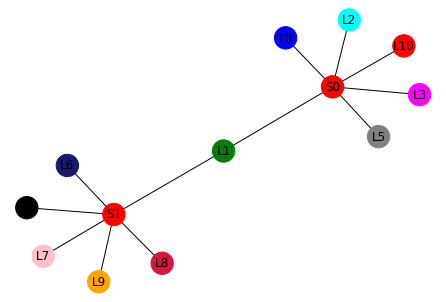

In [7]:
nviz.plot_soma_limb_concept_network(current_neuron,
                                   node_colors=ret_col)

# *************** Prework on Axon classification and finding distance from somas ******************


# Doing Axon Classification

# A) Doing Axon Classification

In [8]:
ns = reload(ns)

In [ ]:
axon_like_limb_branch_dict = ns.axon_width_like_segments(current_neuron,
                                                        include_ais=True)

nviz.visualize_neuron(current_neuron,
                     limb_branch_dict=axon_like_limb_branch_dict,
                     mesh_color="red",
                      mesh_color_alpha=1,
                     mesh_whole_neuron=True)

In [ ]:
#How to give a limb_branch_dict as an argument
ns = reload(ns)
current_functions_list = ["axon_segment"]
limb_branch_dict_upstream_filter = ns.query_neuron(current_neuron,
                                   query="axon_segment==True",
                                   function_kwargs=dict(limb_branch_dict =axon_like_limb_branch_dict,
                                                        downstream_face_threshold=3000,
                                                        width_match_threshold=50,
                                                       print_flag=False),
                                   functions_list=current_functions_list)


In [ ]:
colors_dict_returned = nviz.visualize_neuron(current_neuron,
                      limb_branch_dict=limb_branch_dict_upstream_filter,
                     mesh_color="red",
                     mesh_color_alpha=1,
                     mesh_whole_neuron=True,
                     return_color_dict=True)

# B) Getting All of the Branches That are a certain Distance Away ---

In [ ]:
ns = reload(ns)

In [ ]:
soma_idx = 0

In [ ]:
close_limb_branch_df[close_limb_branch_df["skeletal_distance_from_soma"] == 0]

In [ ]:
distance_from_soma_threshold = 30000
close_limb_branch_dict = ns.query_neuron(current_neuron,
                                        functions_list=[ns.skeletal_distance_from_soma],
                                        query=f"skeletal_distance_from_soma<{distance_from_soma_threshold}",
                                        function_kwargs=dict(somas=[soma_idx]),
                                         #return_dataframe=False


                                        )
close_limb_branch_dict

colors_dict_returned = nviz.visualize_neuron(current_neuron,
                      limb_branch_dict=close_limb_branch_dict,
                     mesh_color="red",
                     mesh_color_alpha=1,
                     mesh_whole_neuron=True,
                     return_color_dict=True)

# C)  Remove the Branches from the Graph

In [ ]:


import networkx_utils as xu
from copy import deepcopy
limbs_to_check = xu.get_neighbors(neuron_copy.concept_network,nru.soma_label(soma_idx),int_label=False)
total_sub_limbs = dict()

sub_limb_color_dict = dict()
new_networks = dict()
for limb_idx in limbs_to_check:
    print(f"\nWorking on Limb {limb_idx}")
    
    sub_limb_color_dict[limb_idx] = dict()
    
    
    
    curr_limb = neuron_copy[limb_idx]
    if limb_idx in close_limb_branch_dict.keys():
        nodes_to_eliminate = close_limb_branch_dict[limb_idx]
    else:
        nodes_to_eliminate = []
    
    #the nodes that were eliminated we need to show deleted colors
    for n in nodes_to_eliminate:
        sub_limb_color_dict[limb_idx][n] = "black"
    
    print(f"nodes_to_eliminate = {nodes_to_eliminate}")
    curr_limb_copy = deepcopy(curr_limb)
    curr_limb_copy.set_concept_network_directional(starting_soma=soma_idx)
    curr_limb_copy.concept_network_directional.remove_nodes_from(nodes_to_eliminate)
    new_networks[limb_idx] = curr_limb_copy.concept_network_directional
    
    curr_limb_conn_comp = list(nx.connected_components(nx.Graph(new_networks[limb_idx])))
    
    if len(curr_limb_conn_comp) == 0:
        curr_limb_conn_comp = [nodes_to_eliminate]
    
    total_sub_limbs[limb_idx] = curr_limb_conn_comp
    
    colors_to_use = mu.generate_unique_random_color_list(n_colors=len(curr_limb_conn_comp),colors_to_omit=["black"])
    for j,(c_comp,curr_random_color) in enumerate(zip(curr_limb_conn_comp,colors_to_use)):
        #get a random color
        print(f"curr_random_color = {curr_random_color}")
        for n in c_comp:
            sub_limb_color_dict[limb_idx][n] = curr_random_color


In [ ]:
import networkx_utils as xu
from copy import deepcopy
limbs_to_check = xu.get_neighbors(neuron_copy.concept_network,nru.soma_label(soma_idx),int_label=False)
total_sub_limbs = dict()

sub_limb_color_dict = dict()
new_networks = dict()
for limb_idx in limbs_to_check:
    print(f"\nWorking on Limb {limb_idx}")
    
    sub_limb_color_dict[limb_idx] = dict()
    
    
    
    curr_limb = neuron_copy[limb_idx]
    if limb_idx in close_limb_branch_dict.keys():
        nodes_to_eliminate = close_limb_branch_dict[limb_idx]
    else:
        nodes_to_eliminate = []
    
    #the nodes that were eliminated we need to show deleted colors
    for n in nodes_to_eliminate:
        sub_limb_color_dict[limb_idx][n] = "black"
    
    print(f"nodes_to_eliminate = {nodes_to_eliminate}")
    curr_limb_copy = deepcopy(curr_limb)
    curr_limb_copy.set_concept_network_directional(starting_soma=soma_idx)
    curr_limb_copy.concept_network_directional.remove_nodes_from(nodes_to_eliminate)
    new_networks[limb_idx] = curr_limb_copy.concept_network_directional
    
    curr_limb_conn_comp = list(nx.connected_components(nx.Graph(new_networks[limb_idx])))
    
    if len(curr_limb_conn_comp) == 0:
        curr_limb_conn_comp = [nodes_to_eliminate]
    
    total_sub_limbs[limb_idx] = curr_limb_conn_comp
    
    colors_to_use = mu.generate_unique_random_color_list(n_colors=len(curr_limb_conn_comp),colors_to_omit=["black"])
    for j,(c_comp,curr_random_color) in enumerate(zip(curr_limb_conn_comp,colors_to_use)):
        #get a random color
        print(f"curr_random_color = {curr_random_color}")
        for n in c_comp:
            sub_limb_color_dict[limb_idx][n] = curr_random_color


# *************** Start of the Axon Pipeline ******************

In [10]:
soma_idx = 0

# Phase 1: Candidates

In [11]:
"""
Purpose: Identify all sublimbs that could be part of the axon

Assumption:
the axon initial segment should have split off [ais_threshold] 
nm of skeletal distance away from the soma 

Pseudocode:
1) Find all branches that are less than [ais_threshold] distance
away from the soma
2) Delete the nodes from the branch graph and then group into connected ocmponents
into candidates
3) Adding back all endpoints that were eliminated in step 2: Process is below
a. Find each endpoint and get the shortest path to the soma
b. Concatenate the paths together into a dictionary mapping node to number of
occurances in the shortest paths
c. Filter each shortest path for only nodes that hae 1 occurance
d. Add all the shortest paths as candidates



"""

'\nPurpose: Identify all sublimbs that could be part of the axon\n\nAssumption:\nthe axon initial segment should have split off [ais_threshold] \nnm of skeletal distance away from the soma \n\nPseudocode:\n1) Find all branches that are less than [ais_threshold] distance\naway from the soma\n2) Delete the nodes from the branch graph and then group into connected ocmponents\ninto candidates\n3) Adding back all endpoints that were eliminated in step 2: Process is below\na. Find each endpoint and get the shortest path to the soma\nb. Concatenate the paths together into a dictionary mapping node to number of\noccurances in the shortest paths\nc. Filter each shortest path for only nodes that hae 1 occurance\nd. Add all the shortest paths as candidates\n\n\n\n'

In [12]:
#1) Find all branches that are less than [ais_threshold] distance
#away from the soma

ais_threshold = 30000
close_limb_branch_dict = ns.query_neuron(current_neuron,
                                        functions_list=[ns.skeletal_distance_from_soma],
                                        query=f"skeletal_distance_from_soma<{ais_threshold}",
                                        function_kwargs=dict(somas=[soma_idx]),
                                         #return_dataframe=False


                                        )
outside_bubble_limb_branch_dict = ns.query_neuron(current_neuron,
                                        functions_list=[ns.skeletal_distance_from_soma],
                                        query=f"skeletal_distance_from_soma>={ais_threshold}",
                                        function_kwargs=dict(somas=[soma_idx]),
                                         #return_dataframe=False


                                        )

In [80]:
# 2) Delete the nodes from the branch graph and then group into connected ocmponents
# into candidates

"""
Pseudocode:
1) Get the limbs touching the soma of inteterst


"""

import networkx_utils as xu
import networkx as nx
import matplotlib_utils as mu
from copy import deepcopy
limbs_to_check = xu.get_neighbors(current_neuron.concept_network,nru.soma_label(soma_idx),int_label=False)

sub_limb_color_dict = dict()
total_sub_limbs = dict() #will map the limbs to the connected components

verbose = True

for limb_idx in limbs_to_check:
    print(f"\nWorking on Limb {limb_idx}")
    
    #initializing the candidate list and the color dictionary for visualization
    total_sub_limbs[limb_idx] = []
    sub_limb_color_dict[limb_idx] = dict()
    
    
    
    curr_limb = current_neuron[limb_idx]
    if limb_idx in close_limb_branch_dict.keys():
        nodes_to_eliminate = close_limb_branch_dict[limb_idx]
    else:
        nodes_to_eliminate = []
    
    #the nodes that were eliminated we need to show deleted colors
    for n in nodes_to_eliminate:
        sub_limb_color_dict[limb_idx][n] = mu.color_to_rgba("black", alpha=1)
    
    if verbose:
        print(f"nodes_to_eliminate = {nodes_to_eliminate}")
        
    curr_limb_copy = deepcopy(curr_limb)
    curr_limb_copy.set_concept_network_directional(starting_soma=soma_idx)
    curr_limb_copy.concept_network_directional.remove_nodes_from(nodes_to_eliminate)
    curr_filt_network = nx.Graph(curr_limb_copy.concept_network_directional)
    
    if len(curr_filt_network) == 0:
        if verbose:
            print("The filtered network is empty so just leaving the candidates as empty lists")
        continue
        
    curr_limb_conn_comp = list(nx.connected_components(curr_filt_network))
    

    total_sub_limbs[limb_idx] = [list(k) for k in curr_limb_conn_comp]
    
    colors_to_use = mu.generate_unique_random_color_list(n_colors=len(curr_limb_conn_comp),colors_to_omit=["black","midnightblue"])
    for j,(c_comp,curr_random_color) in enumerate(zip(curr_limb_conn_comp,colors_to_use)):

        for n in c_comp:
            sub_limb_color_dict[limb_idx][n] = curr_random_color


Working on Limb L0
nodes_to_eliminate = [29 48 49 57 61]

Working on Limb L1
nodes_to_eliminate = [13]

Working on Limb L2
nodes_to_eliminate = [0]

Working on Limb L3
nodes_to_eliminate = [16 28 31]

Working on Limb L5
nodes_to_eliminate = [7 8]

Working on Limb L10
nodes_to_eliminate = [0]
The filtered network is empty so just leaving the candidates as empty lists


In [81]:
nviz.visualize_neuron(current_neuron,
                     limb_branch_dict="all",
                     mesh_color=sub_limb_color_dict,
                     mesh_fill_color="green")


 Working on visualization type: mesh


In [83]:
"""
3) Adding back all endpoints that were eliminated in step 2: Process is below

For each limb
a. Create the subgraph for all the nodes that were eliminated
b. Find each endpoint that was eliminated and get the shortest path to the starting node
c. Concatenate the paths together into a dictionary mapping node to number of
occurances in the shortest paths
d. Filter each shortest path for only nodes that hae 1 occurance
e. Add all the shortest paths as candidates


Version 2: 

For each limb

0) Get all of the endpoint nodes in the whole directed concept network
- remove the starting node from the list
1) Find the shortest path from every endpoint to the starting node
2) Concatenate shortest paths into dictionary mapping node to number of
occurances in the shortest paths
3) Find all of the endpoints that were eliminated with the restriction
4) Filter those endpoint paths for nodes that only have an 
occurance of one for the lookup dictionary
5) Add all deleted endpoint filtered shortest paths as candidates

How to handle corner cases:
1) If only starting node that got deleted
--> just add that as a candidate
2) If all of network got deleted, current way will work

"""
import matplotlib.pyplot as plt

removed_candidates = dict()

for limb_idx in limbs_to_check:
    if verbose:
        print(f"\n----Working on Limb {limb_idx}-----")
        
    curr_limb = current_neuron[limb_idx]    
    
    removed_candidates[limb_idx] = []
    
    if limb_idx in close_limb_branch_dict.keys():
        nodes_to_eliminate = close_limb_branch_dict[limb_idx]
    else:
        nodes_to_eliminate = []
        if verbose:
            print("No nodes were eliminated so don't need to add back any candidates")
        continue

    
    curr_limb_copy = deepcopy(curr_limb)
    curr_limb_copy.set_concept_network_directional(starting_soma=soma_idx)
    curr_network = nx.Graph(curr_limb_copy.concept_network_directional)
    curr_starting_node = curr_limb_copy.current_starting_node
    
    #covering the corner case that only the root node existed
    #and it was deleted
    if len(nodes_to_eliminate) == 1 and len(curr_network)==1:
        if verbose:
            print("network was only of size 1 and that node was eliminated so returning that as the only candidate")
        removed_candidates[limb_idx] = [[curr_starting_node]]
        
    else:
        #0) Get all of the endpoint nodes in the whole directed concept network
        #- remove the starting node from the list
        curr_endpoints = xu.get_nodes_of_degree_k(curr_network,1)
        if curr_starting_node in curr_endpoints:
            curr_endpoints.remove(curr_starting_node)


        #3) Find all of the endpoints that were eliminated with the restriction
        endpoints_eliminated = [k for k in curr_endpoints if k in nodes_to_eliminate]

        if len(endpoints_eliminated) == 0:
            if verbose:
                print("No endpoints were eliminated so don't need to add back any candidates")
            continue

        #1) Find the shortest path from every endpoint to the starting node
        shortest_paths_endpoints = dict()
        for en in curr_endpoints:
            en_shortest_path = nx.shortest_path(curr_network,
                            source = en,
                             target = curr_starting_node)
            shortest_paths_endpoints[en] = en_shortest_path

        #2) Concatenate shortest paths into dictionary mapping node to number of
        #occurances in the shortest paths
        node_occurance = dict()
        for curr_path in shortest_paths_endpoints.values():
            for n in curr_path:
                if n not in node_occurance.keys():
                    node_occurance[n] = 1
                else:
                    node_occurance[n] += 1

        #4) Filter those endpoint paths for nodes that only have an 
        #occurance of one for the lookup dictionary
        added_back_candidates = []
        for en_elim in endpoints_eliminated:
            filtered_path = [k for k in shortest_paths_endpoints[en_elim] if node_occurance[k] == 1]
            added_back_candidates.append(filtered_path)

        if verbose:
            print(f"New candidates added back: {added_back_candidates}")

        removed_candidates[limb_idx] = added_back_candidates
    
    #5) Adding the new paths to the color dictionary for visualization 
    colors_to_use = mu.generate_unique_random_color_list(n_colors=len(removed_candidates[limb_idx]),colors_to_omit=["black","midnightblue"])
    for add_path,curr_random_color in zip(removed_candidates[limb_idx],colors_to_use):
        for n in add_path:
            sub_limb_color_dict[limb_idx][n] = curr_random_color


----Working on Limb L0-----
New candidates added back: [[48]]

----Working on Limb L1-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L2-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L3-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L5-----
No endpoints were eliminated so don't need to add back any candidates

----Working on Limb L10-----
network was only of size 1 and that node was eliminated so returning that as the only candidate


In [84]:
# checking that adding back the candidates went well

nviz.visualize_neuron(current_neuron,
                     limb_branch_dict="all",
                     mesh_color=sub_limb_color_dict,
                     mesh_fill_color="green")


 Working on visualization type: mesh


# Phase 2: Filtering

In [ ]:
"""
Pseudocode: 

Step 1: Cancelling due to denditic components donwstream
a) Use query (the ais_threshold option) to label all potential dendritic and axonal branches
b) Calculate the number of dendritic faces per candidate
c) Cancel the candidate because n_dendritic_faces > threshold

Step 2: Trace Back 
a) Get the closest node to the starting node of that limb
-- have options to check for what to trace back
   i) axonal segment (should always be on)
   ii) width boundary
   
b) trace back the component by finding shortest path to starting node
and adding on each successive node if it is:
   i) axonal segment
   ii) valid width boundary (if selected)

How to cancel:
1) if by the time trace back then get the wdith of the AIS and not wide enough
AKA if average width of first x 1000 nm segments is below the average for AIS
--> this should take care of the width change??

2) If there was a significant width change when tracing back (if selected)

Step 3: Cancelling due to connection point (given that we have traced it back to AIS)
Option 1 : cancelling based on y value of connection point
a) Get the vertices of the connection point with the soma or the connecting dendritic branch
b) compute what percentage of soma vertices are above the connection point
    How? Strip all vertices of soma for y value and ask how many are below the minimum y value
    of the connection point
    
c) if too little of soma vertices are below the min y value of the connetion point then cancel

Option 2: Cancelling based on the direction of the first x nm of the AIS skeleton (Probably not implement because could branch)
a) Get the first x nm of skeleton starting from the AIS
b) Downsample skeleton to just one segment
c) Do a dot product with vector pointing down in y direction to get the relative angle 
d) if angle is below some threshold then cancel




"""

In [ ]:
"""
Apical


"""